## Explora Data and Cleaning Data

Mean length of the words:  9.347760668719754
Standard deviation of the length of the words:  2.981241985260055
Lowest length to 3 standard deviations from the mean:  0.40403471293958937
Highest length to 3 standard deviations from the mean:  18.291486624499917
Current length of the dataframe:  227300
New length of the dataframe:  223546


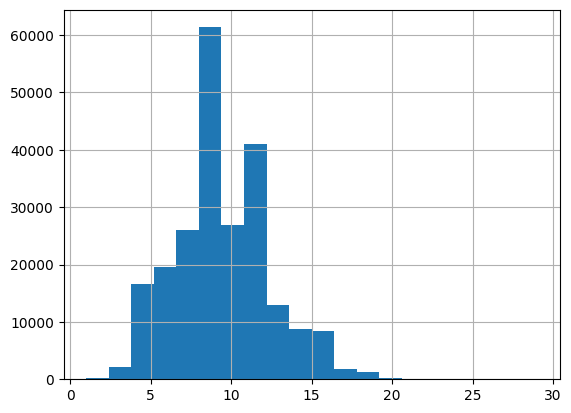

In [23]:
# Load dataset in a pandas dataframe
import pandas as pd

# Load the dataset
raw_word_list = []
with open('data/words_250000_train.txt', 'r') as f:
    for line in f:
        raw_word_list.append(line.strip())

# Create a pandas dataframe with type string
df = pd.DataFrame(raw_word_list, columns=['word'])

# Convert to lowercase
df['word'] = df['word'].str.lower()

# Filter out non-alphabetic entries and remove special characters
df = df[df['word'].str.match(r'^[a-zA-Z]+$')]

# Remove duplicates
df = df.drop_duplicates()

# Add a column with the length of the word
df['length'] = df['word'].apply(len)

# Add a column with the number of unique characters in the word
df['unique'] = df['word'].apply(lambda x: len(set(x)))

# Plot the histogram of the length of the words
df['length'].hist(bins=20)

# Calculate the mean and the standard deviation of the length of the words
mean_length = df['length'].mean()
std_length = df['length'].std()

# Calculate what is the lowest and highest length to 3 standard deviations from the mean
lowest_length = mean_length - 3*std_length
highest_length = mean_length + 3*std_length

# Print the results 
print('Mean length of the words: ', mean_length)
print('Standard deviation of the length of the words: ', std_length)
print('Lowest length to 3 standard deviations from the mean: ', lowest_length)
print('Highest length to 3 standard deviations from the mean: ', highest_length)

# NOTE: to two standard deviations from the mean
# The lowest is 3.389 and highest is 15.310
# I can choose filter length from 3 to 15
# Filter out words with length less than 3 and more than 15
df1 = df[(df['length'] >= 3) & (df['length'] <= 16)]

# Print length change
print('Current length of the dataframe: ', len(df))
print('New length of the dataframe: ', len(df1))

df = df1 


Current length of the dataframe:  223546
New length of the dataframe:  223171


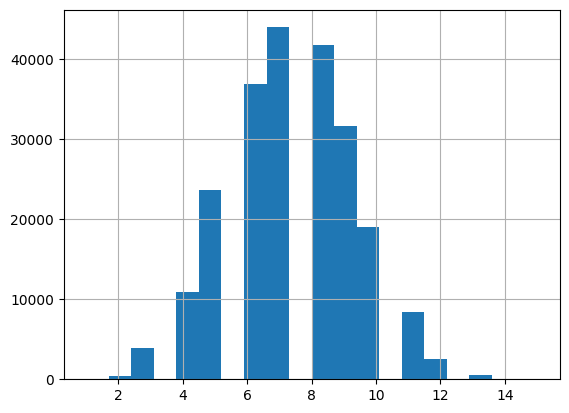

In [24]:
# Plot the histogram of the number of unique characters in the words
df['unique'].hist(bins=20)

# Filter out words with less than 3 unique characters
df1 = df[df['unique'] >= 3]

# Print length change
print('Current length of the dataframe: ', len(df))
print('New length of the dataframe: ', len(df1))

df = df1

Current length of the dataframe:  223171
New length of the dataframe:  221615


<Axes: >

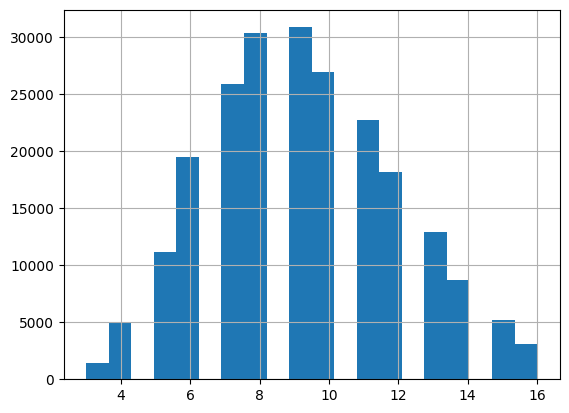

In [25]:
import re

# Rules for invalid words
def is_invalid_word(word):
    # Rule 1: Repeated characters (e.g., "aaaaa")
    # More than 3 times the same letter
    if re.search(r"(.)\1{2,}", word):
        return True
    # Rule 2: No vowels or semi-vowel (y)
    if re.match(r"^[^aeiouy]+$", word, re.IGNORECASE):
        return True
    
    # Rule 3: Uncommon double vocals
    # NOTE: double ee or oo are common, but double aa, ii, uu are not
    # only in some exceptions but as we play hangman it is better to avoid them
    if re.search(r"(aa|ii|uu)", word):
        return True

    return False

# Filter out invalid words
df['invalid'] = df['word'].apply(is_invalid_word)
df1 = df[df['invalid'] == False]

# Print length change
print('Current length of the dataframe: ', len(df))
print('New length of the dataframe: ', len(df1))

df = df1

# Plot the histogram of the length of the words
df['length'].hist(bins=20)

In [26]:
# TODO: What I realize that some words are misspelled
# but are actually words (I can correct the spelling maybe)

# NOTE: I could do this but probably I will be chaging the words a lot

In [27]:
# # Use the NLTK word list to compared only the words in english
# NOTE: I didn't use this because it removes a lot of words
# import nltk
# from nltk.corpus import words

# # Ensure NLTK word list is downloaded
# nltk.download('words')

# # Filter out uncommon words (keep only words in the NLTK English corpus)
# # Keep track of the non-english words
# non_english_words = set(df['word']) - set(words.words())

# # # Filter out non-english words
# df = df[~df['word'].isin(non_english_words)]

# # Print new length of the dataframe
# print('New length of the dataframe: ', len(df))

In [28]:
# Remove the words with most uncommong bigrams and tigrams
# These bigrams and trigrams can be associated with invalid words
# or words that have impossible combinations of letters
from nltk import ngrams

# Function to generate n-grams
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [ ' '.join(grams) for grams in n_grams]

# Generate bigrams, trigrams, and quadrigrams
df['bigrams'] = df['word'].apply(lambda x: generate_ngrams(x, 2))
df['trigrams'] = df['word'].apply(lambda x: generate_ngrams(x, 3))
# df['quadrigrams'] = df['word'].apply(lambda x: generate_ngrams(x, 4))

# Count the frequency of these three types of n-grams
bigrams = df['bigrams'].explode().value_counts()
trigrams = df['trigrams'].explode().value_counts()
# quadrigrams = df['quadrigrams'].explode().value_counts()


bigrams
m z    10
h z    10
g z    10
h q    10
x n    10
       ..
p x     1
w q     1
j b     1
k x     1
v h     1
Name: count, Length: 82, dtype: int64
Last length of the dataframe:  221615
New length of the dataframe:  221297


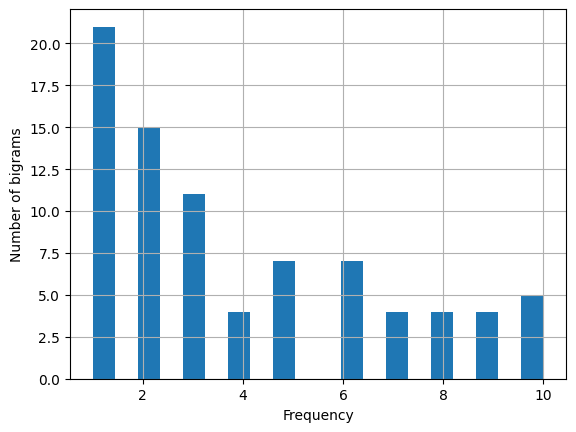

In [29]:
import matplotlib.pyplot as plt

# Plot in a histogram the count of bigrams with frequency less than 10
# add the label to the x-axis and y-axis
threshold = 10
invalid_bigrams = bigrams[bigrams <= threshold]

# Hand cased invalid bigrams
# invalid_bigrams = invalid_bigrams.append(pd.Series(['aa', 'ii', 'uu', 'xz']))

# Display trigrams with frequency less than 10
print(invalid_bigrams)

invalid_bigrams.hist(bins=20)
plt.xlabel('Frequency')
plt.ylabel('Number of bigrams')

# Filter out invalid bigrams
df['invalid_bigrams'] = df['bigrams'].apply(lambda x: any([bigram in invalid_bigrams for bigram in x]))
df1 = df[df['invalid_bigrams'] == False]


# Print last length of the dataframe and new length of the dataframe
print('Last length of the dataframe: ', len(df))
print('New length of the dataframe: ', len(df1))

df = df1

trigrams
n x e    10
e p n    10
x s u    10
e m f    10
i t k    10
         ..
v a o     1
x o y     1
d c m     1
n y k     1
z y v     1
Name: count, Length: 3519, dtype: int64
Last length of the dataframe:  221297
New length of the dataframe:  211385


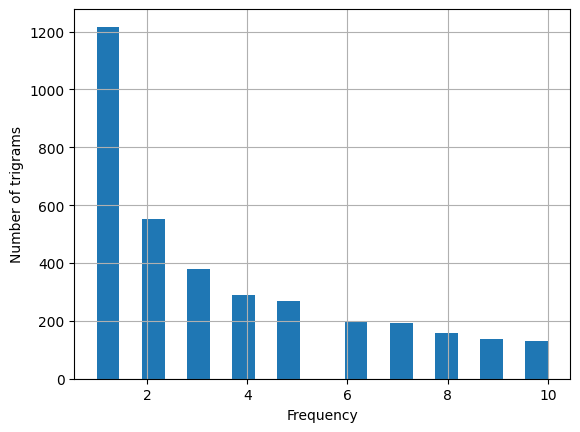

In [30]:
threshold = 10
invalid_trigrams = trigrams[trigrams <= threshold]

# Display trigrams with frequency less than 10
print(invalid_trigrams)

invalid_trigrams.hist(bins=20)
plt.xlabel('Frequency')
plt.ylabel('Number of trigrams')

# Filter out invalid trigrams
df['invalid_trigrams'] = df['trigrams'].apply(lambda x: any([trigram in invalid_trigrams for trigram in x]))
df1 = df[df['invalid_trigrams'] == False]

# Print last length of the dataframe and new length of the dataframe
print('Last length of the dataframe: ', len(df))
print('New length of the dataframe: ', len(df1))

df = df1

<Axes: >

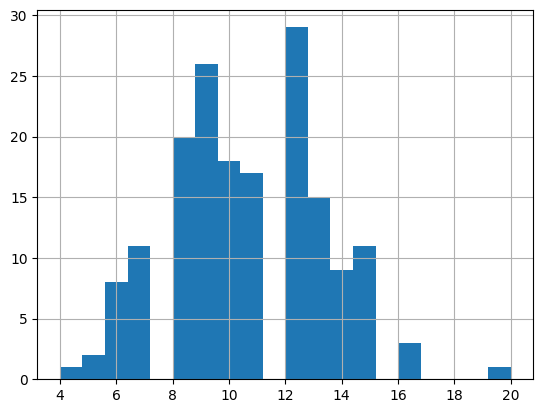

In [31]:
# Load data/practice_words.txt
practice_words = []
with open('data/practice_words.txt', 'r') as f:
    for line in f:
        practice_words.append(line.strip())

# Load in a pandas dataframe
df_practice = pd.DataFrame(practice_words, columns=['word'])

# Plot the histogram of the length of the words
df_practice['length'] = df_practice['word'].apply(len)
df_practice['length'].hist(bins=20)


In [33]:
# Save the filtered words to a new file in ascending order
# df['word'].sort_values().to_csv('data/filtered_words.txt', index=False, header=False)



## Ideas to define the reward function


Text(0, 0.5, 'Frequency')

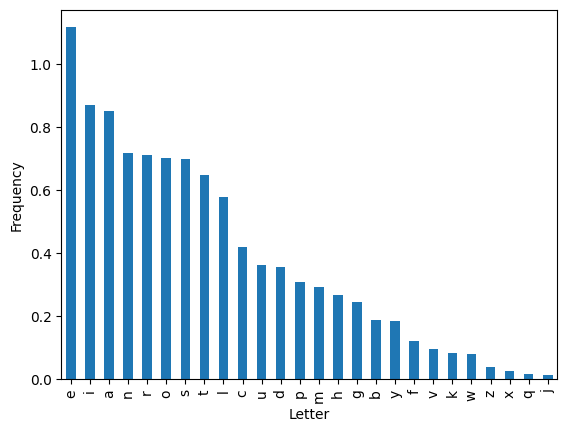

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the filtered words and plot the histogram of frequency of letters
filtered_words = pd.read_csv('data/filtered_words.txt', header=None, names=['word'])

filtered_words = filtered_words.dropna()  # Remove NaN values

# Generate a histogram of the frequency of letters
letters = filtered_words['word'].apply(list).explode()
letter_counts = letters.value_counts()

# Get the relative frequency of the letters
# NOTE: I will need to scale the value to be a more noticeable reward
scale = 10
letter_counts = (letter_counts / letter_counts.sum()) * scale

# Plot the histogram
letter_counts.plot(kind='bar')
plt.xlabel('Letter')
plt.ylabel('Frequency')

## Augment data

Ideas

- Use the suffix and affixes as words

In [46]:
class SuffixTree:
    def __init__(self):
        self.nodes = {0: {}}  # Root node
        self.num = 0  # Node counter

    def add_suffix(self, suffix):
        current_node = 0
        for char in suffix:
            if char not in self.nodes[current_node]:
                self.num += 1
                self.nodes[current_node][char] = self.num
                self.nodes[self.num] = {}
            current_node = self.nodes[current_node][char]

    def find_common_substrings(self, min_count=2, min_length=3):
        result = []
        stack = [(0, "")]
        while stack:
            node, path = stack.pop()
            if len(path) >= min_length and len(self.nodes[node]) >= min_count:
                result.append(path)
            for char, child_node in self.nodes[node].items():
                stack.append((child_node, path + char))
        return result


def generate_subwords(word_list, min_count=2, min_length=3):
    # Build a suffix tree
    tree = SuffixTree()
    for word in word_list:
        for i in range(len(word)):
            tree.add_suffix(word[i:])

    # Find frequent substrings
    common_substrings = tree.find_common_substrings(min_count, min_length)

    # Generate subwords by splitting words at common substrings
    subwords = set()
    for word in word_list:
        splits = [word]
        for substring in common_substrings:
            splits = [part for split in splits for part in split.split(substring) if part]
            subwords.update(splits)
        subwords.update(splits)

    # Filter out very short subwords
    subwords = {subword for subword in subwords if len(subword) >= min_length}

    return list(subwords)

In [44]:
words = []
with open('data/filtered_words.txt', 'r') as f:
    for line in f:
        words.append(line.strip())
words

['ababdeh',
 'abac',
 'abacas',
 'abaci',
 'abacination',
 'abaciscus',
 'aback',
 'abaco',
 'abacterial',
 'abactinally',
 'abactor',
 'abaculus',
 'abacuses',
 'abada',
 'abaddon',
 'abadengo',
 'abadite',
 'abaft',
 'abagail',
 'abailard',
 'abaised',
 'abaisse',
 'abaka',
 'abakas',
 'abalation',
 'abalienated',
 'abalienation',
 'abalones',
 'abamp',
 'abamperes',
 'abana',
 'abandon',
 'abandoned',
 'abandonee',
 'abandoners',
 'abandonment',
 'abandons',
 'abanet',
 'abanic',
 'abantes',
 'abaptiston',
 'abarambo',
 'abaris',
 'abarticular',
 'abas',
 'abased',
 'abasedness',
 'abasements',
 'abasers',
 'abasgi',
 'abashed',
 'abashedness',
 'abashing',
 'abashlessly',
 'abashments',
 'abasias',
 'abasing',
 'abask',
 'abassieh',
 'abastard',
 'abastral',
 'abatage',
 'abated',
 'abatements',
 'abaters',
 'abatic',
 'abatis',
 'abatises',
 'abator',
 'abats',
 'abattis',
 'abattises',
 'abattoirs',
 'abattue',
 'abature',
 'abave',
 'abayah',
 'abbacies',
 'abbacy',
 'abbai',
 '

In [ ]:
# Generate subwords
subwords = generate_subwords(words, min_count=2, min_length=3)

# Save subwords to a file
output_file = "algorithmic_subwords.txt"
with open(output_file, "w") as f:
    for subword in subwords:
        f.write(f"{subword}\n")

print(f"Subwords saved to {output_file}:")
print(subwords)

## Prepare Test Dataset

I want to test the data against two test

1. Words in nkt library that are not used for training.
    - NOTE: I'm not using these words for training (only for test)
2. Words extracted from practice games
    - NOTE: The should be good enough with these games to indicate that at least is good in the practice games

[nltk_data] Downloading package words to /home/zosov/nltk_data...
[nltk_data]   Package words is already up-to-date!


Number of words that are not in the nltk library: 124412


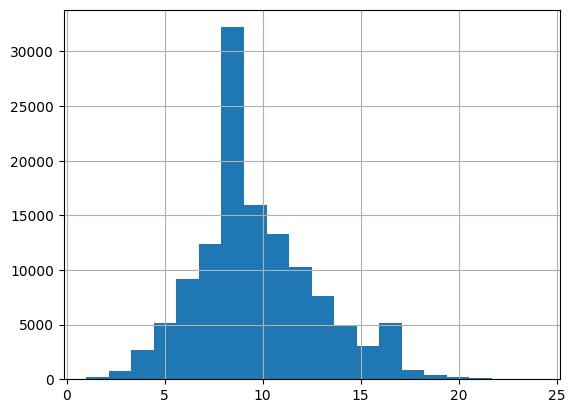

In [51]:
# Load the words from the file and and get the words from nkt library that are not into the words from my file
import nltk
from nltk.corpus import words

raw_words = []
with open('data/filtered_words.txt', 'r') as f:
    for line in f:
        raw_words.append(line.strip())


# Ensure NLTK word list is downloaded
nltk.download('words')

# Get the words from the nltk library
nltk_words = set(words.words())

# lower the words from nltk and filter words only with alphabetic characters
nltk_words = {word.lower() for word in nltk_words if word.isalpha()}

words_not_in_train = nltk_words - set(raw_words)

# Plot the histogram of the length of the words not in train
df = pd.DataFrame(list(words_not_in_train), columns=['word'])
df['length'] = df['word'].apply(len)
df['length'].hist(bins=20)

# Save the words that are not in the nltk library to a file
output_file = "data/test_words_nltk.txt"
with open(output_file, "w") as f:
    for word in words_not_in_train:
        f.write(f"{word}\n")

# Print the length of the words that are not in the nltk library
print(f"Number of words that are not in the nltk library: {len(words_not_in_train)}")

In [21]:
import pandas as pd

# Load the words and calculate the bigrams and trigrams frequencies
raw_words = []
with open('data/filtered_words.txt', 'r') as f:
    for line in f:
        raw_words.append(line.strip())

# Generate bigrams and trigrams
bigrams = {}
trigrams = {}

for word in raw_words:
    for i in range(len(word) - 1):
        bigram = word[i:i + 2]
        bigrams[bigram] = bigrams.get(bigram, 0) + 1
    for i in range(len(word) - 2):
        trigram = word[i:i + 3]
        trigrams[trigram] = trigrams.get(trigram, 0) + 1

# Plot the histogram of the bigrams with frequency less than 10
df = pd.DataFrame(list(bigrams.items()), columns=['bigram', 'frequency'])

# Sort by frequency
df = df.sort_values('frequency')

top_bigrams = df.tail(10).copy()

# Get probabilities
top_bigrams['probability'] = top_bigrams['frequency'] / top_bigrams['frequency'].sum()
top_bigrams


,bigram,frequency,probability
11,at,21319,0.082910
53,ed,21561,0.083852
65,an,23002,0.089456
64,re,23093,0.089810
22,te,24068,0.093601
12,ti,24216,0.094177
14,on,24388,0.094846
34,es,24604,0.095686
9,in,34763,0.135195
23,er,36119,0.140468


In [94]:
raw_words = []
with open('data/test_words_nltk.txt', 'r') as f:
    for line in f:
        raw_words.append(line.strip())

# Get the longest words in the practice words
df = pd.DataFrame(raw_words, columns=['word'])

# Get the length of the words
df['length'] = df['word'].apply(len)

# Sort by length
df = df.sort_values('length', ascending=False)

# Get the longest words
longest_words = df.head(10)
longest_words

,word,length
98399,pathologicopsychological,24
96062,tetraiodophenolphthalein,24
120845,formaldehydesulphoxylate,24
88676,thyroparathyroidectomize,24
54067,scientificophilosophical,24
19019,anthropomorphologically,23
121515,epididymodeferentectomy,23
120896,pericardiomediastinitis,23
106422,gastroenteroanastomosis,23
28458,pathologicohistological,23


# Pretrained Char Embeddings

In [40]:
# NOTE: Is there a embedding dataset of only words in the web?? Yes

# Load a .txt file separated by spaces where the first colulms is the character and the other columns corresponds
# to the word embedding

# Load the dataset
import pandas as pd
import numpy as np
import torch

# Load char embeddings
embeddings_path = 'data/glove.840B.300d-char2.txt'

def load_char_embeddings(embeddings_path):
    print('Processing pretrained character embeds...')
    char_embeddings = {}
    with open(embeddings_path, 'r') as f:
        for line in f:
            line_split = line.strip().split(" ")
            vec = torch.tensor(np.array(line_split[1:], dtype=float))
            char = line_split[0]
            char_embeddings[char] = vec

    # For mask use underscore
    token_mask = char_embeddings["_"]

    # For padding use point
    token_pad = char_embeddings["."]

    # For CLS used to return an cumulated information for the whole word use #
    token_cls = char_embeddings["#"]

    # Filter Character Embeddings for char from a-z and three special tokens
    char_embeddings = {char: vec for char, vec in char_embeddings.items() if char in "abcdefghijklmnopqrstuvwxyz"}
    # Assing char indeces from 0 to 25 to the letters and 26 to 28 to the special tokens
    char_indices = {char: i for i, char in enumerate(char_embeddings.keys(), start=1)}

    char_embeddings["."] = token_pad
    char_embeddings["?"] = token_mask
    char_embeddings["#"] = token_cls
    char_embeddings["_"] = token_mask

    char_indices["."] = 0 #  PAD
    char_indices["?"] = 26 # UNK
    char_indices["#"] = 27 # CLS
    char_indices["_"] = 28 # MASK

    # Create an embedding matrix E
    embedding_matrix = torch.zeros((len(char_embeddings), 300))
    #embedding_matrix = np.random.uniform(-1, 1, (len(chars), 300))
    for char, i in char_indices.items():
        #print ("{}, {}".format(char, i))
        embedding_vector = char_embeddings.get(char)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

char_embeddings = load_char_embeddings(embeddings_path)



Processing pretrained character embeds...


## BERT from scratch

In [42]:
import torch
from torch.nn import Module
from transformers import BertConfig, BertModel, BertTokenizer
from transformers.models.bert.modeling_bert import BertEmbeddings, BertEncoder, BertPooler
from torch.utils.data import Dataset, DataLoader

# Custom Character-Level Tokenizer
class CharTokenizer:
    def __init__(self):
        self.vocab = {char: idx for idx, char in enumerate("abcdefghijklmnopqrstuvwxyz", start=1)}
        self.vocab["[PAD]"] = 0
        self.vocab["[UNK]"] = len(self.vocab)
        self.vocab["[CLS]"] = len(self.vocab)
        self.vocab["[MASK]"] = len(self.vocab)
        self.inv_vocab = {v: k for k, v in self.vocab.items()}
        print("Vocab size: ", len(self.vocab))

    def tokenize(self, text):
        return list(text.lower())
    
    def get_ids(self, tokens):
        return [self.vocab.get(t, self.vocab["[UNK]"]) for t in tokens]

    def encode(self, text, max_length):
        tokens = self.tokenize(text)
        token_ids = self.get_ids(tokens)
        return [self.vocab["[CLS]"]] + token_ids[:max_length] + [self.vocab["[PAD]"]] * (max_length - len(token_ids) - 1)
    
    def decode(self, token_ids):
        return ''.join([self.inv_vocab.get(t, "[UNK]") for t in token_ids if t != 0])
    
# Custom Dataset
class WordDataset(Dataset):
    def __init__(self, words, tokenizer, max_length):
        self.words = words
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.words)
    
    def mlm_masking_word(self, sentence):
        # Tokenize the entire sentence
        # tokenized = self.tokenizer(sentence, return_tensors="pt", add_special_tokens=False)
        # tokens = tokenized["input_ids"].squeeze(0)  # Shape: (seq_len,)

        tokens = self.tokenizer.tokenize(sentence)
        token_ids = torch.tensor(self.tokenizer.get_ids(tokens))

        # Generate random probabilities for each token
        probs = torch.rand(token_ids.shape)

        # 15% of the tokens will be considered for masking
        mask_prob = probs < 0.15
        # print("0.15 Masked:",  mask_prob)

        # Initialize labels (original tokens for masked positions, 0 otherwise)
        labels = torch.where(mask_prob, token_ids, torch.zeros_like(token_ids))
        # print("labels:", labels)

        # 80% of masked tokens will be replaced with [MASK]
        mask_replace_prob = torch.rand(token_ids.shape)
        masked_tokens = torch.where(
            mask_prob & (mask_replace_prob < 0.8), 
            torch.tensor(self.tokenizer.vocab['[MASK]']), 
            token_ids
        )
        # print("80% from masked: ", mask_prob & (mask_replace_prob < 0.8))
        # print(masked_tokens)

        # 10% of masked tokens will be replaced with random tokens
        random_replace_prob = torch.rand(token_ids.shape)
        random_tokens = torch.randint(len(self.tokenizer.vocab), token_ids.shape)
        final_tokens = torch.where(
            mask_prob & (mask_replace_prob >= 0.8) & (random_replace_prob < 0.5),
            random_tokens,
            masked_tokens
        )
        # print("10% from masked: ", mask_prob & (mask_replace_prob >= 0.8) & (random_replace_prob < 0.5))
        # print(final_tokens)

        # Tokens not selected for masking remain unchanged
        # final_tokens = torch.where(mask_prob, final_tokens, token_ids)
        # print(final_tokens)

        # Adding special tokens ids and correcting labels
        return self.add_special_tokens(final_tokens, labels)
    

    def add_special_tokens(self, token_ids, labels):
        # Create CLS and PAD tokens
        cls_token = torch.tensor([self.tokenizer.vocab["[CLS]"]])
        pad_token = torch.tensor([self.tokenizer.vocab["[PAD]"]])

        # Add CLS token and truncate or pad token_ids
        truncated_tokens = token_ids[:self.max_length]
        padded_tokens = torch.cat([cls_token, truncated_tokens, pad_token.repeat(self.max_length - truncated_tokens.size(0) - 1)])

        # Add 0 for CLS and PAD tokens to labels
        zero_label = torch.tensor([0])
        truncated_labels = labels[:self.max_length]
        padded_labels = torch.cat([zero_label, truncated_labels, zero_label.repeat(self.max_length - truncated_labels.size(0) - 1)])

        # Outputs
        final_tokens = padded_tokens  # Shape: (max_length,)
        labels = padded_labels         # Shape: (max_length,)
        return final_tokens, labels


    def __getitem__(self, idx):
        word = self.words[idx]

        input_ids, labels = self.mlm_masking_word(word)

        attention_mask = torch.where(input_ids != self.tokenizer.vocab["[PAD]"], 1, 0)

        output = {"bert_input": input_ids,
                  "bert_label": labels,
                  "attention_mask": attention_mask}
        
        return output

# Head using embedding layer
# If I use the 300 Glove embeddings I can use the embedding layer to predict the word
# class MLMHead(torch.nn.Module):
#     def __init__(self, embedding_layer):
#         """
#         :param embedding_layer: Embedding layer from the model
#         """
#         super().__init__()
#         # Use the embedding layer's weight matrix for the linear layer
#         self.linear = torch.nn.Linear(embedding_layer.word_embeddings.weight.size(1),
#                                        embedding_layer.word_embeddings.weight.size(0))
#         self.linear.weight = embedding_layer.word_embeddings.weight  # Share weights
#         self.softmax = torch.nn.LogSoftmax(dim=-1)

#     def forward(self, x):
#         return self.softmax(self.linear(x))

class MLMHead(torch.nn.Module):
    """
    predicting origin token from masked input sequence
    n-class classification problem, n-class = vocab_size
    """

    def __init__(self, hidden, vocab_size):
        """
        :param hidden: output size of BERT model
        :param vocab_size: total vocab size
        """
        super().__init__()
        self.linear = torch.nn.Linear(hidden, vocab_size)
        self.softmax = torch.nn.LogSoftmax(dim=-1)

    def forward(self, x):
        return self.softmax(self.linear(x))

# Custom BERT Architecture with Configurable Layers
class CustomBERT(Module):
    def __init__(self, vocab_size, hidden_size, num_hidden_layers, num_attention_heads, max_position_embeddings, intermediate_size):
        super(CustomBERT, self).__init__()
        self.config = BertConfig(
            vocab_size=vocab_size,
            hidden_size=hidden_size,
            num_hidden_layers=num_hidden_layers,
            num_attention_heads=num_attention_heads,
            max_position_embeddings=max_position_embeddings,
            intermediate_size=intermediate_size,
        )
        self.embeddings = BertEmbeddings(self.config)
        self.encoder = BertEncoder(self.config)
        self.mlm_head = MLMHead(hidden_size, vocab_size)
        # self.pooler = BertPooler(config)

    def forward(self, input_ids, attention_mask):
        embeddings = self.embeddings(input_ids=input_ids)

        # NOTE: I have to add to dimension in between for the attention mask
        # because it will be used to calculatation the attention scores
        attention_mask = attention_mask.unsqueeze(1).unsqueeze(2)

        # Encoder ouputs can return the embeddings in each layer, but here
        # I only interested in the last hidden state
        encoder_outputs = self.encoder(embeddings, attention_mask=attention_mask, return_dict=True)

        # Pooler is used to get the CLS token embedding and apply 
        # a linear transformation to it + tanh activation
        # output = self.pooler(encoder_outputs.last_hidden_state)

        # MLM head output
        output = self.mlm_head(encoder_outputs.last_hidden_state)

        # return encoder_outputs.last_hidden_state, output
        return output

/home/zosov/anaconda3/envs/character-bert/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
import tqdm
import math


class BERTTrainer:
    def __init__(
        self, 
        model, 
        train_dataloader, 
        test_dataloader=None, 
        lr= 1e-4,
        weight_decay=0.01,
        betas=(0.9, 0.999),
        log_freq=10,
        device='cuda'
        ):

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = model.to(self.device)
        self.train_data = train_dataloader
        self.test_data = test_dataloader

        # Setting the Adam optimizer with hyper-param
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr, betas=betas, weight_decay=weight_decay)

        # Using Negative Log Likelihood Loss function for predicting the masked_token
        self.criterion = torch.nn.NLLLoss(ignore_index=0)
        self.log_freq = log_freq
        print("Total Parameters:", sum([p.nelement() for p in self.model.parameters()]))
    
    def train(self, epoch):
        self.iteration(epoch, self.train_data)

    def test(self, epoch):
        self.iteration(epoch, self.test_data, train=False)

    def iteration(self, epoch, data_loader, train=True):
        
        avg_loss = 0.0
        total_correct = 0  # To track correct predictions
        total_masked = 0   # To track total masked tokens

        mode = "train" if train else "test"

        # progress bar
        data_iter = tqdm.tqdm(
            enumerate(data_loader),
            desc="EP_%s:%d" % (mode, epoch),
            total=len(data_loader),
            bar_format="{l_bar}{r_bar}"
        )

        for i, data in data_iter:

            # batch_data will be sent into the device(GPU or cpu)
            data = {key: value.to(self.device) for key, value in data.items()}

            # forward the model
            mask_lm_output = self.model.forward(data["bert_input"], data["attention_mask"])

            # NLLLoss of predicting masked token word
            # transpose to (m, vocab_size, seq_len) vs (m, seq_len)
            # criterion(mask_lm_output.view(-1, mask_lm_output.size(-1)), data["bert_label"].view(-1))
            
            # NOTE: the mask_lm_output will return -log probability values,
            # then the criterion will only average the values of the masked tokens
            loss = self.criterion(mask_lm_output.transpose(1, 2), data["bert_label"])

            # backward and optimization only in train
            if train:
                # self.optim_schedule.zero_grad()
                self.optimizer.zero_grad()
                loss.backward()
                # self.optim_schedule.step_and_update_lr()
                self.optimizer.step()

            # Update average loss
            avg_loss += loss.item()

            # Calculate predictions and accuracy
            predictions = torch.argmax(mask_lm_output, dim=-1)  # Shape: (batch_size, seq_len)
            correct = (predictions == data["bert_label"]) & (data["bert_label"] != 0)  # Exclude padding
            total_correct += correct.sum().item()
            total_masked += (data["bert_label"] != 0).sum().item()  # Exclude padding tokens

            # Calculate perplexity
            # NOTE: perplexity is not well defined for masked language models like BERT (see summary of the models).
            perplexity = math.exp(avg_loss / (i + 1))

            # Calculate masked token accuracy
            accuracy = total_correct / total_masked if total_masked > 0 else 0

            post_fix = {
                "epoch": epoch,
                "iter": i,
                "avg_loss": round(avg_loss / (i + 1), 3),
                "loss": round(loss.item(), 3),
                "perplexity": round(perplexity, 3),
                "accuracy": round(accuracy, 3)
            }

            if i % self.log_freq == 0:
                data_iter.write(str(post_fix))


        # Final epoch logging
        final_accuracy = total_correct / total_masked if total_masked > 0 else 0
        # print(
        #     f"EP{epoch}, {mode}: \
        #     avg_loss={avg_loss / len(data_iter):.4f}, \
        #     perplexity={math.exp(avg_loss / len(data_iter)):.4f}, \
        #     accuracy={final_accuracy:.4f}"
        # )

In [44]:
# Configuration
hidden_size = 128 # 300 for using Glove embeddings
num_hidden_layers = 4  # Change as needed
num_attention_heads = 4
max_position_embeddings = 32  # Max word length
intermediate_size = 512
max_word_length = 32
batch_size = 16

# Initialize Components
tokenizer = CharTokenizer()
vocab_size = len(tokenizer.vocab)
model = CustomBERT(
    vocab_size=vocab_size, # 4 special tokens
    hidden_size=hidden_size,
    num_hidden_layers=num_hidden_layers,
    num_attention_heads=num_attention_heads,
    max_position_embeddings=max_position_embeddings,
    intermediate_size=intermediate_size,
)


Vocab size:  30


In [45]:
tokenizer.vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '[PAD]': 0,
 '[UNK]': 27,
 '[CLS]': 28,
 '[MASK]': 29}

In [46]:
model.config.hidden_size

128

In [48]:
# Configuration
hidden_size = 128 # 300 for using Glove embeddings
num_hidden_layers = 4  # Change as needed
num_attention_heads = 4
max_position_embeddings = 32  # Max word length
intermediate_size = 512
max_word_length = 32
batch_size = 16

# Initialize Components
tokenizer = CharTokenizer()
vocab_size = len(tokenizer.vocab)
model = CustomBERT(
    vocab_size=vocab_size, # 4 special tokens
    hidden_size=hidden_size,
    num_hidden_layers=num_hidden_layers,
    num_attention_heads=num_attention_heads,
    max_position_embeddings=max_position_embeddings,
    intermediate_size=intermediate_size,
)


# # Example Dataset
# words = ["apple", "banana", "cherry", "date"]

# Load the dataset in a list from a .txt file
words = []
with open('data/filtered_words.txt', 'r') as f:
    for line in f:
        words.append(line.strip())

train_data = WordDataset(words, tokenizer, max_word_length)
train_loader = DataLoader(train_data,
                          batch_size=batch_size, 
                          shuffle=True,
                          pin_memory=True)

Vocab size:  30


In [99]:
import re

def extract_successful_words(log, output_file):
    # Regex to find lines where status is 'success' and extract the word
    success_pattern = r"Sever response: .*?\'status\': \'success\',.*?\'word\': \'(.*?)\'"

    # Find all matches
    successful_words = re.findall(success_pattern, log)

    # Process words by removing spaces between characters
    processed_words = [word.replace(" ", "") for word in successful_words]

    # Write the words to a .txt file
    with open(output_file, "w") as file:
        for word in processed_words:
            file.write(word + "\n")

# Read log data from a file
with open("data/practice_games.txt", "r") as log_file:
    log_data = log_file.read()

# Output file name
output_filename = "data/practice_words.txt"

# Call the function
extract_successful_words(log_data, output_filename)

print(f"Extracted words have been saved to {output_filename}.")


Extracted words have been saved to data/practice_words.txt.


## Design a valid metric to measure how hangman performs

## Creating the OpenAI Gym enviornment


In [ ]:
# NOTE: Probably will no be necessary to change one character 
# randomly and always to mask at least one character

In [49]:
import gymnasium as gym
from gymnasium import spaces

import numpy as np
from collections import Counter, defaultdict
import string

class HangmanEnv(gym.Env):
    def __init__(self, word_list, max_length_word = 32):
        super(HangmanEnv, self).__init__()

        self.word_list = word_list
        self.vocab = string.ascii_lowercase
        self.max_lives = 6
        self.max_length_word = max_length_word

        # To match the tokenizer identifiers set the special tokens id
        self.mask_token = 29
        self.cls_token = 28
        self.pad_token = 0 

        self.top_bigrams, self.top_trigrams = self._calculate_top_n_gram()

        # Observation space: Current word state and one-hot vector for tried letters
        # spaces.Box( low = 0, high = np.inf, shape=(4,), dtype=np.float64)
        # self.observation_space = spaces.Dict({
        #     "observation": spaces.MultiDiscrete([len(self.vocab) + 2] * max_length_word),
        #     "tried_letters": spaces.MultiBinary(len(self.vocab))
        # })
        # NOTE: sum +4 to the high because there are 4 special tokens in the tokenizer
        # UNK, PAD, CLS, MASK
        self.observation_space = spaces.Dict({
            "observation": spaces.Box( low = 0, high = len(self.vocab) + 4, shape=(self.max_length_word,), dtype=np.int32),
            "tried_letters": spaces.Box( low = 0, high = 1, shape=(len(self.vocab),), dtype=np.int32)
        })

        # Action space: Choosing a letter from the vocabulary
        self.action_space = spaces.Discrete(len(self.vocab))

        # Precompute global letter frequencies
        letter_counts = Counter("".join(self.word_list))
        total_letters = sum(letter_counts.values())
        self.global_letter_frequencies = {
            letter: count / total_letters for letter, count in letter_counts.items()
        }

    def _get_info(self):
        return {}

    def reset(self, word_id=None):
        self.target_word = np.random.choice(self.word_list)
        if word_id is not None:
            self.target_word = self.word_list[word_id]
        self.word_state = ["_"] * len(self.target_word)
        self.tried_letters = set()
        self.lives = self.max_lives
        
        return self._get_obs(), self._get_info()

    def step(self, action):
        letter = self.vocab[action]
        reward = 0

        info_bonus = {}

        if letter in self.tried_letters:
            reward = -2  # Penalty for repeating a letter
        else:
            self.tried_letters.add(letter)
            if letter in self.target_word:
                # Correct guess: Update word state and calculate reward
                bonus, info_bonus = self._calculate_correct_guess_reward(letter)
                reward+= bonus
                for i, char in enumerate(self.target_word):
                    if char == letter:
                        self.word_state[i] = letter

                # Check if the game is won
                if "_" not in self.word_state:
                    info_bonus["result"] = "win"
                    return self._get_obs(), 50, True, False, info_bonus
            else:
                # Incorrect guess: Deduct a life and apply penalty
                self.lives -= 1
                reward -= 5

                # Check if the game is lost
                if self.lives <= 0:
                    return self._get_obs(), reward, True, False, {"result": "loss"}

        return self._get_obs(), reward, False, False, info_bonus
    
    def _calculate_top_n_gram(self, n = 50):
        # Calculate all the bigrams and trigrams frequencies in the wordlist
        bigram_frequencies = defaultdict(int)

        for word in self.word_list:
            for i in range(1, len(word)):
                bigram_frequencies[word[i - 1] + word[i]] += 1

        trigram_frequencies = defaultdict(int)

        for word in self.word_list:
            for i in range(2, len(word)):
                trigram_frequencies[word[i - 2] + word[i - 1] + word[i]] += 1

        # Divide to the total number of bigrams and trigrams
        total_bigrams = sum(bigram_frequencies.values())
        total_trigrams = sum(trigram_frequencies.values())

        bigram_frequencies = {k: v / total_bigrams for k, v in bigram_frequencies.items()}
        trigram_frequencies = {k: v / total_trigrams for k, v in trigram_frequencies.items()}

        # Take the top 50 bigrams and trigrams
        top_bigrams = dict(sorted(bigram_frequencies.items(), key=lambda item: item[1], reverse=True)[:n])
        top_trigrams = dict(sorted(trigram_frequencies.items(), key=lambda item: item[1], reverse=True)[:n])

        return list(top_bigrams.keys()), list(top_trigrams.keys())


    def _calculate_correct_guess_reward(self, letter, scale=10):
        # Reward for correct guess based on global and relative frequencies
        global_reward = self.global_letter_frequencies.get(letter, 0) * scale
        
        # Calculate relative frequencies for current pattern
        pattern = "".join(
            c if c != "_" else "." for c in self.word_state
        )
        matching_words = [w for w in self.word_list if len(w) == len(self.target_word) and all(
            p == c or p == "." for p, c in zip(pattern, w))]
        relative_letter_counts = Counter("".join(matching_words))
        total_relative_letters = sum(relative_letter_counts.values())
        relative_frequencies = {
            l: (relative_letter_counts.get(l, 0) + 1) / (total_relative_letters + len(self.vocab))
            for l in self.vocab
        }

        relative_reward = relative_frequencies[letter] * scale

        # Additional reward for matching bigrams or trigrams with the current letter

        temp_dict = {k : 0.5 for k in self.top_bigrams}
        bigram_bonus = sum(
            temp_dict.get(self.word_state[i - 1] + letter, 0)
            for i in range(1, len(self.word_state)) if self.word_state[i - 1] != "_"
        )

        temp_dict = {k : 1. for k in self.top_trigrams}
        trigram_bonus = sum(
            temp_dict.get("".join(self.word_state[0:2]) + letter, 0)
            for i in range(2, len(self.word_state)) if "".join(self.word_state[0:2]) != "__"
        )

        # Calculate a ratio depending if the game is starting or ending
        # Count the number of underscores in the word state
        num_underscores = self.word_state.count("_")

        # Set the ratio as num_underscores / len(self.word_state)
        ratio = num_underscores / len(self.word_state)

        # NOTE: if the ratio is close to 0 the game is ending
        # if the ratio is close to 1 the game is starting
        # 
        # if the game is starting prioritize the global reward
        # if the game is ending prioritize the relative reward        

        # global_reward *= ratio
        # relative_reward *= 1 - ratio
        info_rewards = {
            "global_reward": global_reward,
            "relative_reward": relative_reward,
            "bigram_bonus": bigram_bonus,
            "trigram_bonus": trigram_bonus
        }

        return global_reward * ratio + relative_reward * (1 - ratio) + bigram_bonus + trigram_bonus, info_rewards

    def _get_obs(self):
        # Encode word state as integers (numeric representation only)
        # NOTE: sum  + 1 to shifht the indexes because the 0 is for the padding
        word_state_encoded = [
            self.vocab.index(char) + 1 if char in self.vocab else self.mask_token  # self.mask_token for '_'
            for char in self.word_state
        ]

        # Add cls token in the beginning
        word_state_encoded = [self.cls_token] + word_state_encoded

        # Pad word_state_encoded to match max_length_word
        word_state_encoded += [self.pad_token] * (self.max_length_word - len(word_state_encoded))

        # NOTE: these are not shifted because this will be used for the one-hot encoding
        tried_letters_encoded = [1 if char in self.tried_letters else 0 for char in self.vocab]

        return {
            "observation": np.array(word_state_encoded, dtype=np.int32),
            "tried_letters": np.array(tried_letters_encoded, dtype=np.int32)
        }

    def render(self, mode="human"):
        if mode == "human":
            print("Word:", " ".join(self.word_state))
            print("Tried Letters:", " ".join(sorted(self.tried_letters)))
            print(f"Lives Left: {self.lives}")

    def close(self):
        pass

# Example usage
if __name__ == "__main__":
    word_list = ["apple", "banana", "cherry", "date"]
    id2char = {i: c for i, c in enumerate(string.ascii_lowercase)}

    env = HangmanEnv(word_list)
    obs = env.reset()
    env.render()

    # NOTE: Here is a little bit of a miss match the possible action are values from 0 to 25
    # but the indices in the observation are from 1 to 26 in observation because it is prepared
    # to go into the BERT model
    # additionally special token are added to the observation
    # PAD: 0, UNK: 27, CLS: 28, MASK: 29
    done = False
    while not done:
        action = env.action_space.sample()  # Random action
        obs, reward, done, truncate, info = env.step(action)
        env.render()
        # Map action to letter
        print(f"Observation: {obs}")
        print(f"Done: {done}, Info: {info}")
        print(f"Action: {id2char[action]} Reward: {reward}")

    print("Game Over:", info)




Word: _ _ _ _ _ _
Tried Letters: 
Lives Left: 6
Word: _ _ _ _ _ _
Tried Letters: l
Lives Left: 5
Observation: {'observation': array([28, 29, 29, 29, 29, 29, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32), 'tried_letters': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)}
Done: False, Info: {}
Action: l Reward: -5
Word: _ _ _ _ _ _
Tried Letters: k l
Lives Left: 4
Observation: {'observation': array([28, 29, 29, 29, 29, 29, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32), 'tried_letters': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)}
Done: False, Info: {}
Action: k Reward: -5
Word: _ _ _ _ _ y
Tried Letters: k l y
Lives Left: 4
Observation: {'observation': array([28, 29, 29, 29, 29, 29, 25,  0,  0,  0,  0,  

In [50]:
from gymnasium.envs.registration import register

register(
    id='HangmanEnv-v0',
    entry_point='__main__:HangmanEnv',
    max_episode_steps=100
)

/home/zosov/anaconda3/envs/character-bert/lib/python3.10/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment HangmanEnv-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [86]:
from torchrl.envs import GymWrapper
import gymnasium as gym

from torchrl.envs import (
    RewardSum,
    StepCounter,
    TransformedEnv
)

env = gym.make("HangmanEnv-v0", word_list=word_list)
env = GymWrapper(env, device="cpu")
env = TransformedEnv(env)
env.append_transform(RewardSum())
env.append_transform(StepCounter()) # NOTE: Cartpole-v1 has a max of 500 steps
print(env.spec.max_episode_steps)

100


In [87]:
from torchrl.envs.utils import RandomPolicy
from torchrl.collectors import SyncDataCollector
    
policy = RandomPolicy(env.action_spec)

collector = SyncDataCollector(
    create_env_fn=env,
    policy=policy,
    frames_per_batch=100,
    # total_frames=100,
    device="cpu",
    storing_device="cpu",
    max_frames_per_traj=-1
)

for i, data in enumerate(collector):
    # Print the observation by using tokenizer.vocab
    # for row in data:
    #     print("Observation: ", [tokenizer.inv_vocab[i.item()] for i in row['observation']])
    #     print("Tried Letters: ", [tokenizer.inv_vocab[i.item()] for i in row['tried_letters']])
    #     print("Reward: ", row[('next','reward')])
    #     print("Done: ", row['done'])
    
    print(i)
    
    if i == 10:
        break

0
1
2
3
4
5
6
7
8
9
10


In [ ]:
for data in collector:
    # Print the observation by using tokenizer.vocab
    for row in data:
        print("Observation: ", [tokenizer.inv_vocab[i.item()] for i in row['observation']])
        print("Tried Letters: ", [tokenizer.inv_vocab[i.item()] for i in row['tried_letters']])
        print("Reward: ", row[('next','reward')])
        print("Done: ", row['done'])

In [88]:
data

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([100, 26]), device=cpu, dtype=torch.int64, is_shared=False),
        collector: TensorDict(
            fields={
                traj_ids: Tensor(shape=torch.Size([100]), device=cpu, dtype=torch.int64, is_shared=False)},
            batch_size=torch.Size([100]),
            device=cpu,
            is_shared=False),
        done: Tensor(shape=torch.Size([100, 1]), device=cpu, dtype=torch.bool, is_shared=False),
        episode_reward: Tensor(shape=torch.Size([100, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        next: TensorDict(
            fields={
                done: Tensor(shape=torch.Size([100, 1]), device=cpu, dtype=torch.bool, is_shared=False),
                episode_reward: Tensor(shape=torch.Size([100, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                observation: Tensor(shape=torch.Size([100, 32]), device=cpu, dtype=torch.int32, is_shared=False),
                reward: Ten

In [95]:
data["next", "reward"][data["next", "done"]]

tensor([-5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5.])

In [90]:
data["next", "step_count"][data["next", "done"]]

tensor([11,  8, 11,  6,  6, 10, 12,  8,  6,  8,  9,  6,  6])

In [76]:
data['next','done']

tensor([[False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False

In [54]:
data['observation']

tensor([[28, 29, 29, 29, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [28, 29, 29, 29, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [28, 29, 29, 29, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [28,  4, 29, 29, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]],
       dtype=torch.int32)

In [34]:
data['observation'].shape

torch.Size([4, 32, 28])

In [24]:
import gymnasium
print(gymnasium.__version__)


0.29.1


## Metric to test performance


In [ ]:
import torch
import string
import numpy as np

# Define a function to map the model's predictions to the environment's action space
def get_model_action(model, observation, id2char, char2id):
    # Prepare input for the model
    word_state = observation["word_state"]
    tried_letters = observation["tried_letters"]

    # Convert to PyTorch tensors
    word_state_tensor = torch.tensor(word_state).unsqueeze(0)  # Add batch dimension
    tried_letters_tensor = torch.tensor(tried_letters).unsqueeze(0)

    # Get the model's prediction (logits)
    with torch.no_grad():
        logits = model(word_state_tensor)

    # Mask logits for already tried letters
    mask = torch.tensor(tried_letters).bool()
    logits[0, mask] = -float('inf')  # Mask tried letters

    # Choose the action with the highest score
    action = torch.argmax(logits, dim=-1).item()
    return action

# Evaluate the model on the dataset
def evaluate_model_on_env(model, env, id2char, char2id):
    successes = 0
    total_games = len(env.word_list)

    for word_id in range(total_games):
        obs = env.reset(word_id=word_id)
        done = False

        while not done:
            # Get the model's action
            action = get_model_action(model, obs, id2char, char2id)

            # Step through the environment
            obs, reward, done, info = env.step(action)

        # Check if the game was won
        if info.get("result") == "win":
            successes += 1

    print(f"Model succeeded in {successes} out of {total_games} games.")
    return successes, total_games

# Example usage
if __name__ == "__main__":
    # Initialize environment and model
    word_list = ["apple", "banana", "cherry", "date"]
    env = HangmanEnv(word_list)

    vocab_size = len(string.ascii_lowercase)
    hidden_size = 768
    num_hidden_layers = 12
    num_attention_heads = 12
    max_position_embeddings = 512
    intermediate_size = 3072

    # Load the trained CustomBERT model
    model = CustomBERT(
        vocab_size=vocab_size,
        hidden_size=hidden_size,
        num_hidden_layers=num_hidden_layers,
        num_attention_heads=num_attention_heads,
        max_position_embeddings=max_position_embeddings,
        intermediate_size=intermediate_size
    )
    model.load_state_dict(torch.load("path_to_trained_model.pth"))  # Load trained weights
    model.eval()  # Set to evaluation mode

    # Create mappings for actions
    id2char = {i: c for i, c in enumerate(string.ascii_lowercase)}
    char2id = {c: i for i, c in enumerate(string.ascii_lowercase)}

    # Evaluate the model
    evaluate_model_on_env(model, env, id2char, char2id)


In [60]:
tensor_4x26

tensor([[0.8606, 0.5638, 0.9007, 0.2305, 0.1370, 0.2878, 0.7329, 0.1999, 0.3102,
         0.4462, 0.5940, 0.4585, 0.2173, 0.9192, 0.3986, 0.9942, 0.3415, 0.6786,
         0.0135, 0.3448, 0.8307, 0.0535, 0.7975, 0.9212, 0.4779, 0.3999],
        [0.2505, 0.1203, 0.3704, 0.8049, 0.7245, 0.6905, 0.2470, 0.7787, 0.8087,
         0.3449, 0.8918, 0.0836, 0.6429, 0.7794, 0.2095, 0.2459, 0.9488, 0.2661,
         0.7652, 0.9729, 0.2596, 0.7548, 0.9212, 0.0465, 0.9482, 0.0320],
        [0.4924, 0.5319, 0.0785, 0.6073, 0.8891, 0.6519, 0.4274, 0.1364, 0.3448,
         0.5177, 0.5817, 0.3047, 0.2093, 0.5968, 0.2021, 0.8204, 0.1443, 0.9781,
         0.6928, 0.0606, 0.8092, 0.3931, 0.3735, 0.4632, 0.0756, 0.0617],
        [0.6894, 0.9582, 0.7509, 0.1695, 0.3600, 0.5648, 0.3183, 0.2897, 0.7744,
         0.7027, 0.7167, 0.4722, 0.4175, 0.2409, 0.1826, 0.4561, 0.5213, 0.0938,
         0.8364, 0.2471, 0.3345, 0.9964, 0.0302, 0.2914, 0.9273, 0.3485]])

In [59]:
import torch

# Example tensors
tensor_4x26 = torch.rand(4, 26)  # Replace with your actual tensor
action_ids = torch.tensor([3, 15, 7, 22])  # Example action IDs (length 4)

# Reshape action_ids to (4, 1) for broadcasting
action_ids = action_ids.unsqueeze(1)

# Use torch.gather to select values
selected_values = torch.gather(tensor_4x26, 1, action_ids)

print("Selected values:", selected_values)

Selected values: tensor([[0.2305],
        [0.2459],
        [0.1364],
        [0.0302]])
